# 벽 부수고 이동하기[G4]
---
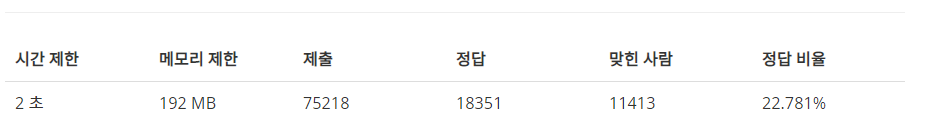

**문제**

    N×M의 행렬로 표현되는 맵이 있다. 맵에서 0은 이동할 수 있는 곳을 나타내고, 1은 이동할 수 없는 벽이 있는 곳을 나타낸다. 당신은 (1, 1)에서 (N, M)의 위치까지 이동하려 하는데, 이때 최단 경로로 이동하려 한다. 최단경로는 맵에서 가장 적은 개수의 칸을 지나는 경로를 말하는데, 이때 시작하는 칸과 끝나는 칸도 포함해서 센다.

    만약에 이동하는 도중에 한 개의 벽을 부수고 이동하는 것이 좀 더 경로가 짧아진다면, 벽을 한 개 까지 부수고 이동하여도 된다.

    한 칸에서 이동할 수 있는 칸은 상하좌우로 인접한 칸이다.

    맵이 주어졌을 때, 최단 경로를 구해 내는 프로그램을 작성하시오.

**입력**

    첫째 줄에 N(1 ≤ N ≤ 1,000), M(1 ≤ M ≤ 1,000)이 주어진다. 다음 N개의 줄에 M개의 숫자로 맵이 주어진다. (1, 1)과 (N, M)은 항상 0이라고 가정하자.

**출력**
    
    첫째 줄에 최단 거리를 출력한다. 불가능할 때는 -1을 출력한다.
    
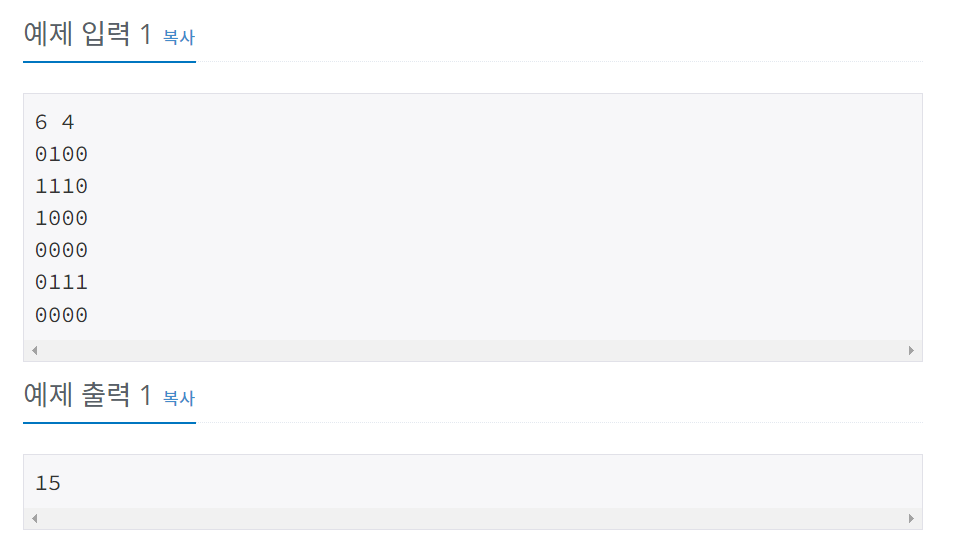
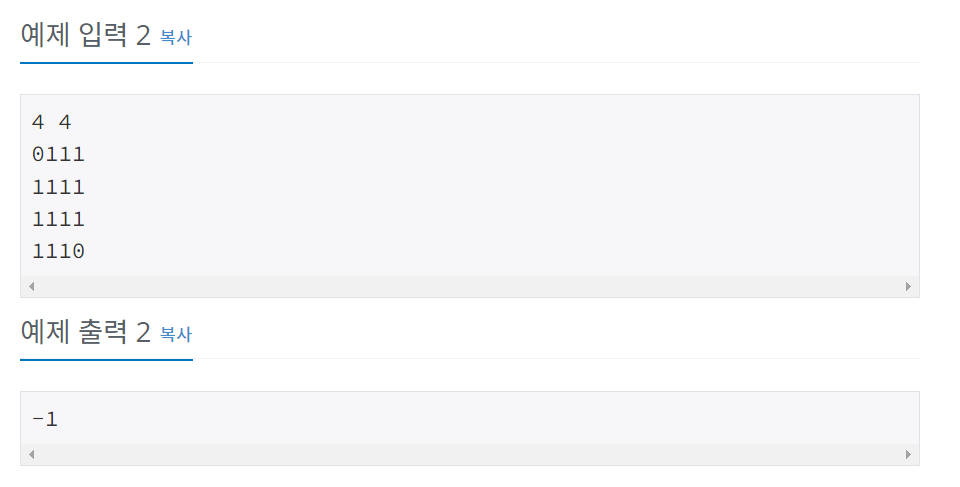

### BFS의 변형 문제이다
### 벽을 부순다는 행위를 저장하기 위한 별도의 변수가 필요하다

- 처음 시도는 벽을 부쉈다는 행위를 표시하기 위한 변수 flag를 설정했다.
- 다음 위치 중 이동할 수 있는 곳 중에서
    - 다음 위치가 벽이 없는 경우라면 큐에 다음 위치를 삽입한다.
    - 다음 위치가 벽이 있는 경우에
       - 벽을 부순적이 있다면(flag이 1일 경우) 이동하지 못한다.(여기가 문제)
       - 벽을 부순적이 없다면 flag를 1을 표시해 벽을 부쉈음을 표시한다.
       
--> 이동 가능한 좌표에서 돌아가지 않으려고 visited가 꼭 있어야한다.

In [ ]:
# 2206 G4
from collections import deque
import sys

def bfs(graph, n, m):

    # 동서남북으로 이동
    dx = [-1, 1, 0, 0]
    dy = [0, 0, 1, -1]

    # 벽을 부쉈는지 표시하는 지표    
    flag = False

    queue = deque()
    queue.append((0, 0, 0, flag)) # x, y, dist, flag
    visited = [[0 for i in range(m)] for j in n]
    visited[0][0] = 1
    
    while queue:
        
        # 현재 (x, y) 좌표와 flag 
        x, y, dist, flag = queue.popleft()
        
        if x == n-1 and y == m-1:
            return dist

        # 동서남북으로 이동.
        for i in range(4):
            nx, ny = x + dx[i], y + dy[i]
            
            # 이동이 가능한 경로
            if 0 <= nx < n and 0 <= ny < m:
                
                # 이전에 방문했던 위치를 제외하고 
                # 다음 위치에 벽이 없는경우 그대로 이동한다.
                if graph[nx][ny] == 0 and not visited[nx][ny]:
                    visited[nx][ny] = 1 # 방문 표시
                    queue.append((nx, ny, dist + 1, flag))

                # 다음 위치가 벽인 경우                
                elif graph[nx][ny] == 1 not visited[nx][y]:  # <- flag                               
                    if flag: # 벽을 부순적이 있다면
                        continue
                        
                    else: # 벽을 부순적이 없다면 flag를 True로 변경하여 벽을 부쉈음을 표시한다.
                        flag = True
                        visited[nx][ny] = 1
                        queue.append((nx, ny, dist + 1, flag))
    return -1

n, m = map(int, sys.stdin.readline().split())
graph = [list(map(int, input())) for _ in range(n)]
print(bfs(graph, n, m))

참고한 코드

===> **3차원 배열을 생각해야한다**

    최단 경로를 따라가는 BFS 알고리즘의 특성을 이용한 미로찾기와 비슷하지만, 벽 부수기라는 새로운 요소가 추가된 문제였다. 미로찾기 문제와 비슷하게 visited를 만들되, 각 칸이 요소를 2개씩 가진 3차원 배열을 만들어주었다.

    visited[x][y][w] 에서 w가 0이라면 벽을 한번 뚫은 상태이고, 1이라면 아직 벽을 한번 뚫을 수 있는 상태를 나타닌다.

    BFS 알고리즘을 순환하면서, 벽을 뚫을 수 있는 상태이고, 벽을 만난다면 벽을 뚫어주고 + 1을 해준다. 아직 방문하지 않았고 벽이 아니라면 + 1을 해준다.

https://ca.ramel.be/82

In [ ]:
from collections import deque
import sys

def bfs(graph, n, m):

    # 동서남북으로 이동
    dx = [-1, 1, 0, 0]
    dy = [0, 0, 1, -1]

    queue = deque()
    queue.append([0, 0, 1])
    visit = [[[0] * 2 for _ in range(m)] for _ in range(n)]
    visit[0][0][1] = 1
    
    while queue:
        x, y, w = queue.popleft()
        
        # 마지막 노드에 도착했을 때
        if x == n - 1 and y == m - 1:
            return visit[x][y][w]
        
        for i in range(4):
            nx, ny = x + dx[i], y + dy[i]

            if 0 <= nx < n and 0 <= ny < m:
                if graph[nx][ny] == 1 and w == 1:
                    visit[nx][ny][0] = visit[x][y][1] + 1
                    queue.append([nx, ny, 0])
                elif graph[nx][ny] == 0 and visit[nx][ny][w] == 0:
                    visit[nx][ny][w] = visit[x][y][w] + 1
                    queue.append([nx, ny, w])
    return -1


n, m = map(int, sys.stdin.readline().split())
graph = [list(map(int, sys.stdin.readline().rstrip())) for _ in range(n)]
print(bfs(graph, n, m))